In [1]:
import pandas as pd
import numpy as np
import pylab
import datetime as dt
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(color_codes=True)

In [2]:
raw = pd.read_pickle('wrds_relationship')
#raw.head().T

In [3]:
raw.head().T

,0,1,2,3,4
start,2016-11-03 00:00:00,2016-11-03 00:00:00,2016-11-03 00:00:00,2016-11-03 00:00:00,2016-11-03 00:00:00
end,2017-08-10 00:00:00,2017-08-10 00:00:00,2017-08-10 00:00:00,2016-11-03 00:00:00,2016-11-03 00:00:00
rev_,1.86334e+09,1.86334e+09,1.86334e+09,1.86334e+09,1.86336e+09
id,COMP-100000146,COMP-100003419,COMP-100005033,COMP-100005156,COMP-100005156
rel_type,COMPETITOR,COMPETITOR,COMPETITOR,COMPETITOR,COMPETITOR
source_company_id,194517865,1919323,1919323,1919323,1919323
target_company_id,194526071,1503347,1881542,6059160,6059160
subsidiaries,None,None,None,None,None
revenue_percent,NaN,NaN,NaN,NaN,NaN
percent_estimated,Y,Y,Y,Y,Y


In [77]:
len(raw['id'])

2090566

In [4]:
raw_source = raw[['source_company_id']]
raw_target = raw[['target_company_id']]

In [6]:
raw_target['source_company_id'] = raw_target['target_company_id']

/Users/xingkong/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [7]:
raw_target.head()

,target_company_id,source_company_id
0,194526071,194526071
1,1503347,1503347
2,1881542,1881542
3,6059160,6059160
4,6059160,6059160


In [8]:
raw_firm = pd.merge(raw_source, raw_target, how='outer', on=['source_company_id'])

In [10]:
len(raw_firm['source_company_id'].unique())

204494

In [79]:
len(raw['source_company_id'].unique())

32276

# Customers

In [3]:
raw_customers = raw.loc[raw['rel_type'] == 'CUSTOMER']
raw_suppliers = raw.loc[raw['rel_type'] == 'SUPPLIER']

In [4]:
raw_customers = raw_customers[['start','end','rel_type','source_company_id','target_company_id', 
                               'source_ticker','source_cusip','source_isin','source_sedol',
                              'target_ticker','target_cusip','target_isin','target_sedol']]

In [5]:
raw_suppliers = raw_suppliers[['start','end','rel_type','source_company_id','target_company_id', 
                               'source_ticker','source_cusip','source_isin','source_sedol',
                              'target_ticker','target_cusip','target_isin','target_sedol']]

In [6]:
raw_customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 731283 entries, 419967 to 1186828
Data columns (total 13 columns):
start                731283 non-null datetime64[ns]
end                  731283 non-null datetime64[ns]
rel_type             731283 non-null object
source_company_id    731283 non-null object
target_company_id    731283 non-null object
source_ticker        589308 non-null object
source_cusip         589809 non-null object
source_isin          589755 non-null object
source_sedol         589809 non-null object
target_ticker        399359 non-null object
target_cusip         401351 non-null object
target_isin          401233 non-null object
target_sedol         401386 non-null object
dtypes: datetime64[ns](2), object(11)
memory usage: 78.1+ MB


In [7]:
raw_suppliers.head()

,start,end,rel_type,source_company_id,target_company_id,source_ticker,source_cusip,source_isin,source_sedol,target_ticker,target_cusip,target_isin,target_sedol
1732002,2003-06-08,2003-06-08,SUPPLIER,10007,15813,None,None,None,None,None,None,None,None
1798242,2003-06-08,2004-05-26,SUPPLIER,10007,244091,None,None,None,None,VZ,92343V104,US92343V1044,2090571
1799363,2004-05-26,2004-05-26,SUPPLIER,10007,244091,None,None,None,None,VZ,92343V104,US92343V1044,2090571
1799560,2003-04-03,2006-12-05,SUPPLIER,10007,6259,None,None,None,None,None,None,None,None
1799615,2006-12-05,2006-12-05,SUPPLIER,10007,6259,None,None,None,None,None,None,None,None


In [8]:
df_sup_cus = pd.concat([raw_customers, raw_suppliers])

In [74]:
len(df_sup_cus['source_company_id'].unique())

25300

In [75]:
len(df_sup_cus['target_company_id'].unique())

113533

In [9]:
df_sup_cus.head()

,start,end,rel_type,source_company_id,target_company_id,source_ticker,source_cusip,source_isin,source_sedol,target_ticker,target_cusip,target_isin,target_sedol
419967,2005-06-15,2005-06-15,CUSTOMER,10394,6477,None,None,None,None,None,None,None,None
420260,2003-04-03,2003-07-13,CUSTOMER,10408,1145,None,None,None,None,None,None,None,None
420738,2003-07-13,2003-07-13,CUSTOMER,10408,1145,None,None,None,None,None,None,None,None
420892,2003-04-27,2005-06-15,CUSTOMER,10435,313,None,None,None,None,None,None,None,None
421128,2005-06-15,2005-06-15,CUSTOMER,10435,313,None,None,None,None,None,None,None,None


In [10]:
source_cusip = pd.DataFrame(df_sup_cus['source_cusip'].unique(), columns = ['source_cusip'])

In [11]:
target_cusip = pd.DataFrame(df_sup_cus['target_cusip'].unique(), columns = ['target_cusip'])

In [12]:
source_cusip['cusip'] = source_cusip['source_cusip']
target_cusip['cusip'] = target_cusip['target_cusip']

In [13]:
target_cusip.head()

,target_cusip,cusip
0,None,None
1,Y7087B109,Y7087B109
2,Y7127B135,Y7127B135
3,30231G102,30231G102
4,Y8547N139,Y8547N139


In [14]:
target_cusip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19004 entries, 0 to 19003
Data columns (total 2 columns):
target_cusip    19003 non-null object
cusip           19003 non-null object
dtypes: object(2)
memory usage: 297.0+ KB


In [15]:
source_cusip.head()

,source_cusip,cusip
0,None,None
1,Y7693G104,Y7693G104
2,V6796A108,V6796A108
3,Y1668L107,Y1668L107
4,J12459103,J12459103


In [16]:
source_cusip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19711 entries, 0 to 19710
Data columns (total 2 columns):
source_cusip    19710 non-null object
cusip           19710 non-null object
dtypes: object(2)
memory usage: 308.1+ KB


In [23]:
merge_1 = pd.merge(source_cusip, target_cusip, how='outer', on=['cusip'])

In [24]:
merge_1['target_cusip'] = 1

In [25]:
merge_1.head()

,source_cusip,cusip,target_cusip
0,None,None,1
1,Y7693G104,Y7693G104,1
2,V6796A108,V6796A108,1
3,Y1668L107,Y1668L107,1
4,J12459103,J12459103,1


In [26]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26122 entries, 0 to 26121
Data columns (total 3 columns):
source_cusip    19710 non-null object
cusip           26121 non-null object
target_cusip    26122 non-null int64
dtypes: int64(1), object(2)
memory usage: 816.3+ KB


In [27]:
len(merge_1['cusip'].unique())

26122

In [70]:
# comp_cusip = pd.read_sas('comp_cusip.sas7bdat', encoding='iso-8859-1')
# comp_cusip = comp_cusip.drop_duplicates(subset='cusip', keep='first')
# comp_cusip = comp_cusip.set_index('cusip')
# comp_cusip.info()

In [28]:
comp_cusip_api = pd.read_pickle('comp_cusip_api.pkl')

In [29]:
comp_cusip_api.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38751 entries, 0 to 785630
Data columns (total 2 columns):
cusip    38750 non-null object
tic      38745 non-null object
dtypes: object(2)
memory usage: 908.2+ KB


In [30]:
comp_cusip_api.head()

,cusip,tic
0,000032102,AE.2
8,000165100,AMFD.
15,000352104,AAIC
23,00099V004,4165A
53,000354100,ANTQ


In [31]:
merge_2 = pd.merge(comp_cusip_api, merge_1,how='inner', on=['cusip'])

In [32]:
merge_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6282 entries, 0 to 6281
Data columns (total 4 columns):
cusip           6281 non-null object
tic             6281 non-null object
source_cusip    5356 non-null object
target_cusip    6282 non-null int64
dtypes: int64(1), object(3)
memory usage: 245.4+ KB


In [33]:
merge_2.head()

,cusip,tic,source_cusip,target_cusip
0,000361105,AIR,000361105,1
1,02376R102,AAL,02376R102,1
2,001058205,IWKS,001058205,1
3,014752109,ALX,014752109,1
4,83088M102,SWKS,83088M102,1


In [34]:
len(comp_cusip_api['cusip'].unique())

38751

In [26]:
company = pd.read_pickle('company.pkl')

In [42]:
company = company.drop_duplicates(subset='cusip', keep='first')

In [43]:
company.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 169030 entries, 0 to 1831998
Data columns (total 4 columns):
id        169030 non-null object
ticker    156220 non-null object
cusip     169029 non-null object
sedol     112477 non-null object
dtypes: object(4)
memory usage: 6.4+ MB


In [27]:
company.head()

,id,ticker,cusip,sedol
0,1647,BPL,11823010,None
1,4084,FMER,33791510,None
2,236891,ELUX,01019820,None
3,6729,MPOW,62473L30,None
4,5101,HMT,44107P10,None


In [44]:
merge_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26122 entries, 0 to 26121
Data columns (total 3 columns):
source_cusip    19710 non-null object
cusip           26121 non-null object
target_cusip    19003 non-null object
dtypes: object(3)
memory usage: 816.3+ KB


In [35]:
merge_3 = pd.merge(merge_1, company,how='inner', on=['cusip'])

In [37]:
merge_3 = merge_3.drop_duplicates(subset='cusip', keep='first')

In [38]:
merge_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26122 entries, 0 to 870677
Data columns (total 6 columns):
source_cusip    19710 non-null object
cusip           26121 non-null object
target_cusip    19003 non-null object
id              26122 non-null object
ticker          26025 non-null object
sedol           26108 non-null object
dtypes: object(6)
memory usage: 1.4+ MB


In [39]:
merge_3.head()

,source_cusip,cusip,target_cusip,id,ticker,sedol
0,None,None,None,241286,None,None
710747,Y7693G104,Y7693G104,Y7693G104,194505765,IW5-SG,6388755
710753,V6796A108,V6796A108,V6796A108,22443458,OANDO-NG,6241405
710759,Y1668L107,Y1668L107,Y1668L107,194527177,533278-IN,B4Z9XF5
710765,J12459103,J12459103,NaN,22447908,4924-JP,6591940


In [35]:
comp_gics = pd.read_sas('gics.sas7bdat', encoding='iso-8859-1')
comp_gics.head()

,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,cusip,curcd,costat,gind,gsector,sic
0,001004,2002-05-31,2001.0,INDL,C,D,STD,000361105,USD,A,201010,20,5080
1,001004,2003-05-31,2002.0,INDL,C,D,STD,000361105,USD,A,201010,20,5080
2,001004,2004-05-31,2003.0,INDL,C,D,STD,000361105,USD,A,201010,20,5080
3,001004,2005-05-31,2004.0,INDL,C,D,STD,000361105,USD,A,201010,20,5080
4,001004,2006-05-31,2005.0,INDL,C,D,STD,000361105,USD,A,201010,20,5080


In [36]:
comp_gics = comp_gics.drop_duplicates(subset='cusip', keep='first')

In [37]:
comp_gics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22403 entries, 0 to 200230
Data columns (total 13 columns):
gvkey       22403 non-null object
datadate    22403 non-null datetime64[ns]
fyear       21849 non-null float64
indfmt      22403 non-null object
consol      22403 non-null object
popsrc      22403 non-null object
datafmt     22403 non-null object
cusip       22402 non-null object
curcd       21849 non-null object
costat      22403 non-null object
gind        17906 non-null object
gsector     17906 non-null object
sic         22403 non-null object
dtypes: datetime64[ns](1), float64(1), object(11)
memory usage: 2.4+ MB


In [38]:
merge_4 = pd.merge(merge_1, comp_gics,how='inner', on=['cusip'])

In [39]:
merge_4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6119 entries, 0 to 6118
Data columns (total 15 columns):
source_cusip    5339 non-null object
cusip           6118 non-null object
target_cusip    6119 non-null int64
gvkey           6119 non-null object
datadate        6119 non-null datetime64[ns]
fyear           5955 non-null float64
indfmt          6119 non-null object
consol          6119 non-null object
popsrc          6119 non-null object
datafmt         6119 non-null object
curcd           5955 non-null object
costat          6119 non-null object
gind            6094 non-null object
gsector         6094 non-null object
sic             6119 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(12)
memory usage: 764.9+ KB


In [40]:
len(merge_4['gind'].unique())

72

In [56]:
merge_4.head()

,source_cusip,cusip,target_cusip,gvkey,datadate,fyear,indfmt,consol,popsrc,datafmt,curcd,costat,gind,gsector,sic
0,None,None,None,144220,2011-12-31,2011.0,INDL,C,D,STD,USD,I,NaN,NaN,6726
1,630402105,630402105,630402105,007685,2002-06-30,2002.0,INDL,C,D,STD,USD,A,452030,45,3669
2,247748106,247748106,NaN,003855,2002-06-30,2002.0,INDL,C,D,STD,USD,I,551020,55,4923
3,879080109,879080109,879080109,010390,2002-12-31,2002.0,INDL,C,D,STD,USD,A,601020,60,0100
4,71361F100,71361F100,71361F100,025676,2002-06-30,2002.0,INDL,C,D,STD,USD,A,452030,45,3827


In [57]:
merge_4['gind'].unique()

array([nan, '452030', '551020', '601020', '452020', '101020', '451020',
       '453010', '201060', '151010', '501010', '402030', '452010',
       '451010', '352030', '451030', '601010', '254010', '253020',
       '201010', '501020', '351010', '255040', '351020', '202010',
       '352020', '253010', '252010', '352010', '303010', '251010',
       '151040', '201040', '201030', '101010', '202020', '203030',
       '303020', '201020', '551040', '403010', '201050', '151030',
       '251020', '252030', '255020', '401010', '351030', '302020',
       '301010', '203040', '401020', '302010', '404020', '402020',
       '203010', '201070', '402010', '151050', '203020', '252020',
       '551030', '551050', '551010', '255010', '203050', '151020',
       '302030', '404030', '402040', '255030', '404010'], dtype=object)

In [41]:
gics_wiki = pd.read_pickle('gics_wiki.pkl')

In [42]:
gics_wiki['gind'] = gics_wiki['code']
gics_wiki.head()

,code,sector,gind
0,Sector,Industry Group,Sector
1,10,Energy,10
2,10101020,Oil & Gas Equipment & Services,10101020
3,101020,"Oil, Gas & Consumable Fuels",101020
4,10102020,Oil & Gas Exploration & Production,10102020


In [43]:
len(gics_wiki['code'].unique())

262

In [58]:
merge_5 = pd.merge(merge_4, gics_wiki,how = 'inner', on=['gind'])

In [59]:
merge_5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4666 entries, 0 to 4665
Data columns (total 17 columns):
source_cusip    4082 non-null object
cusip           4666 non-null object
target_cusip    4666 non-null int64
gvkey           4666 non-null object
datadate        4666 non-null datetime64[ns]
fyear           4541 non-null float64
indfmt          4666 non-null object
consol          4666 non-null object
popsrc          4666 non-null object
datafmt         4666 non-null object
curcd           4541 non-null object
costat          4666 non-null object
gind            4666 non-null object
gsector         4666 non-null object
sic             4666 non-null object
code            4666 non-null object
sector          4666 non-null object
dtypes: datetime64[ns](1), float64(1), int64(1), object(14)
memory usage: 656.2+ KB


In [60]:
merge_6 = merge_5[['cusip','gind','sector']]

In [71]:
len(merge_6['sector'].unique())

57

In [62]:
merge_6.head()

,cusip,gind,sector
0,630402105,452030,"Electronic Equipment, Instruments & Components"
1,71361F100,452030,"Electronic Equipment, Instruments & Components"
2,532257805,452030,"Electronic Equipment, Instruments & Components"
3,747277101,452030,"Electronic Equipment, Instruments & Components"
4,15101Q108,452030,"Electronic Equipment, Instruments & Components"


In [63]:
sector_hist = pd.DataFrame(merge_6.groupby('sector').size(), columns = ['numbers'])

In [65]:
sector_hist =sector_hist.sort_values(['numbers'], ascending = False)

In [66]:
sector_hist.head()

,numbers
sector,
"Oil, Gas & Consumable Fuels",471
Biotechnology,306
Metals & Mining,254
Software,252
"Electronic Equipment, Instruments & Components",185


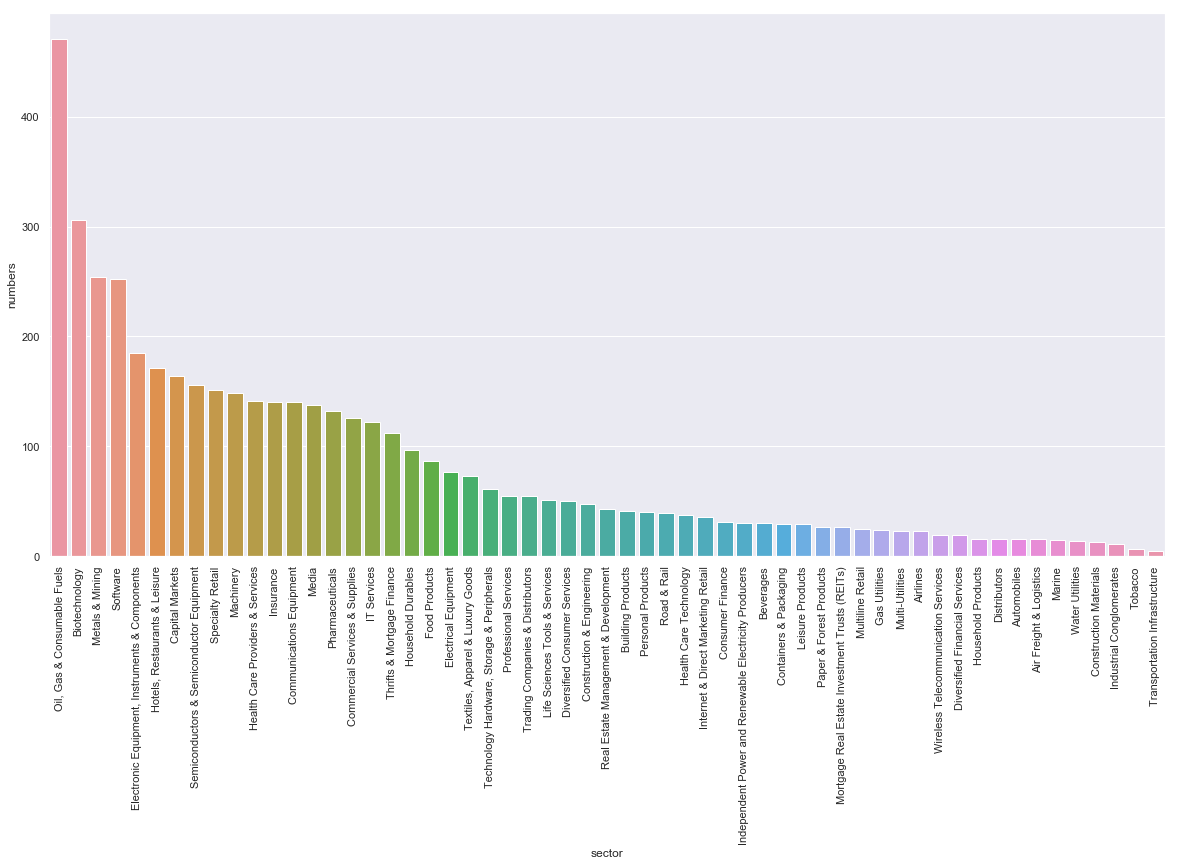

In [69]:
plt.figure(figsize=(20,10))
# plot barh chart with index as x values
ax = sns.barplot(sector_hist.index,sector_hist['numbers'])
ax.set_xticklabels(sector_hist.index)
for item in ax.get_xticklabels(): item.set_rotation(90)
#plt.show()
pylab.rcParams['figure.figsize'] = (20, 10)
pylab.savefig('supply_chain_sector.png', dpi=400, bbox_inches = 'tight')